In [42]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import sklearn
import pickle

In [43]:
#load and read csv file
data_module= pd.read_csv("Salary_Data.csv")
data_module.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [44]:
data_module.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
YearsExperience    30 non-null float64
Salary             30 non-null float64
dtypes: float64(2)
memory usage: 560.0 bytes


In [45]:
data_module.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [46]:
# Imputer = Imputer(missing_values="NaN",strategy="mean",axis=0)

In [47]:
data_module.dtypes

YearsExperience    float64
Salary             float64
dtype: object

In [48]:
data_module.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [49]:
#split dataset into train and test
train,test=train_test_split(data_module,test_size=0.3,random_state=0)
print("train",train.shape)
print("test",test.shape)

train (21, 2)
test (9, 2)


In [50]:
#save datafile into csv file
train.to_csv("train.csv",index=False)
test.to_csv("test.csv",index= False)

In [51]:
train_module= pd.read_csv("train.csv")
train_module.head()

,YearsExperience,Salary
0,7.9,101302.0
1,2.9,56642.0
2,5.1,66029.0
3,3.2,64445.0
4,4.5,61111.0


In [52]:
# splitting training data into train and cross validation dataset 
train_data,cv_data=train_test_split(train_module,test_size=0.3,random_state=0)

In [53]:
X_train= train_data.iloc[:,:-1].values
y_train=train_data.iloc[:,1].values
# print(X_train)
# print(y_train)

In [54]:
print("x train data:",X_train.shape)
# print(x_train)
print("y train data:",y_train.shape)

x train data: (14, 1)
y train data: (14,)


In [55]:
#split train data into train and cross validation dataset 
train_data,cv_data=train_test_split(train,test_size=0.3,random_state=0)
print("train_data",train_data.shape)
# print(train)
print("cross-validate data",cv_data.shape)

train_data (14, 2)
cross-validate data (7, 2)


In [56]:
# fitting simple linear regression to the training dataset
regressor = LinearRegression()  
regressor.fit( X_train, y_train) 


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [57]:
y_pred_tr = regressor.predict(X_train)

In [58]:
y_pred_tr

array([ 94498.42727851,  91738.17149115,  74256.55150451,  70576.2104547 ,
        76096.72202942, 104619.36516551,  47574.07889334,  56774.93151788,
        41133.48205615,  39293.31153125,  58615.10204279, 101859.10937815,
       111980.04726514,  84377.48939151])

In [59]:
#train
train_accuracy= sklearn.metrics.r2_score(y_train,y_pred_tr)*100
train_accuracy

93.1781732002388

In [60]:
file = open("train_data.pkl",'wb')
pickle.dump(regressor,file)

In [61]:
file1= open("train_data.pkl",'rb')
regressor1=pickle.load(file1)

In [62]:
#save datafile into csv file 
cv_data.to_csv("cv_data.csv",index=False)

In [63]:
cv_data_X= cv_data.iloc[:,:-1].values
cv_data_y=cv_data.iloc[:,1].values

In [64]:
print("x cross validate data:",cv_data_X.shape)
print("y cross validate data:",cv_data_y.shape)

x cross validate data: (7, 1)
y cross validate data: (7,)


In [65]:
y_pred_cv = regressor1.predict(cv_data_X)

In [66]:
y_pred_cv

array([125781.32620196,  63215.52835506,  65975.78414242,  55854.84625543,
        83457.40412906,  49414.24941824,  58615.10204279])

In [67]:
#cv
test_accuracy= sklearn.metrics.r2_score(cv_data_y,y_pred_cv)*100
test_accuracy

94.42631048325192

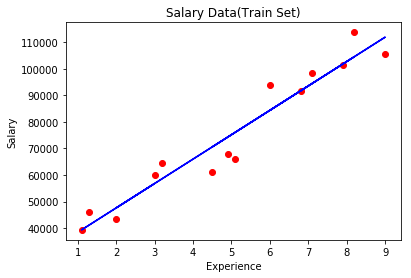

In [68]:
# visualizing the training set result
plt.scatter(X_train,y_train,color='red')
plt.plot(X_train,regressor.predict(X_train),color='blue')
plt.title('Salary Data(Train Set)')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.show()

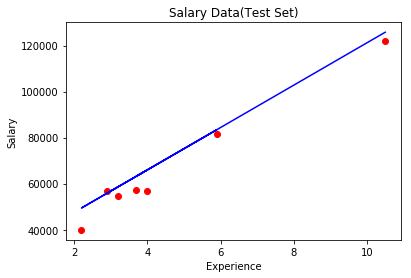

In [69]:
#visualizing the testing set result
plt.scatter(cv_data_X,cv_data_y,color='red')
plt.plot(cv_data_X,regressor.predict(cv_data_X),color='blue')
plt.title('Salary Data(Test Set)')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.show()
